2501


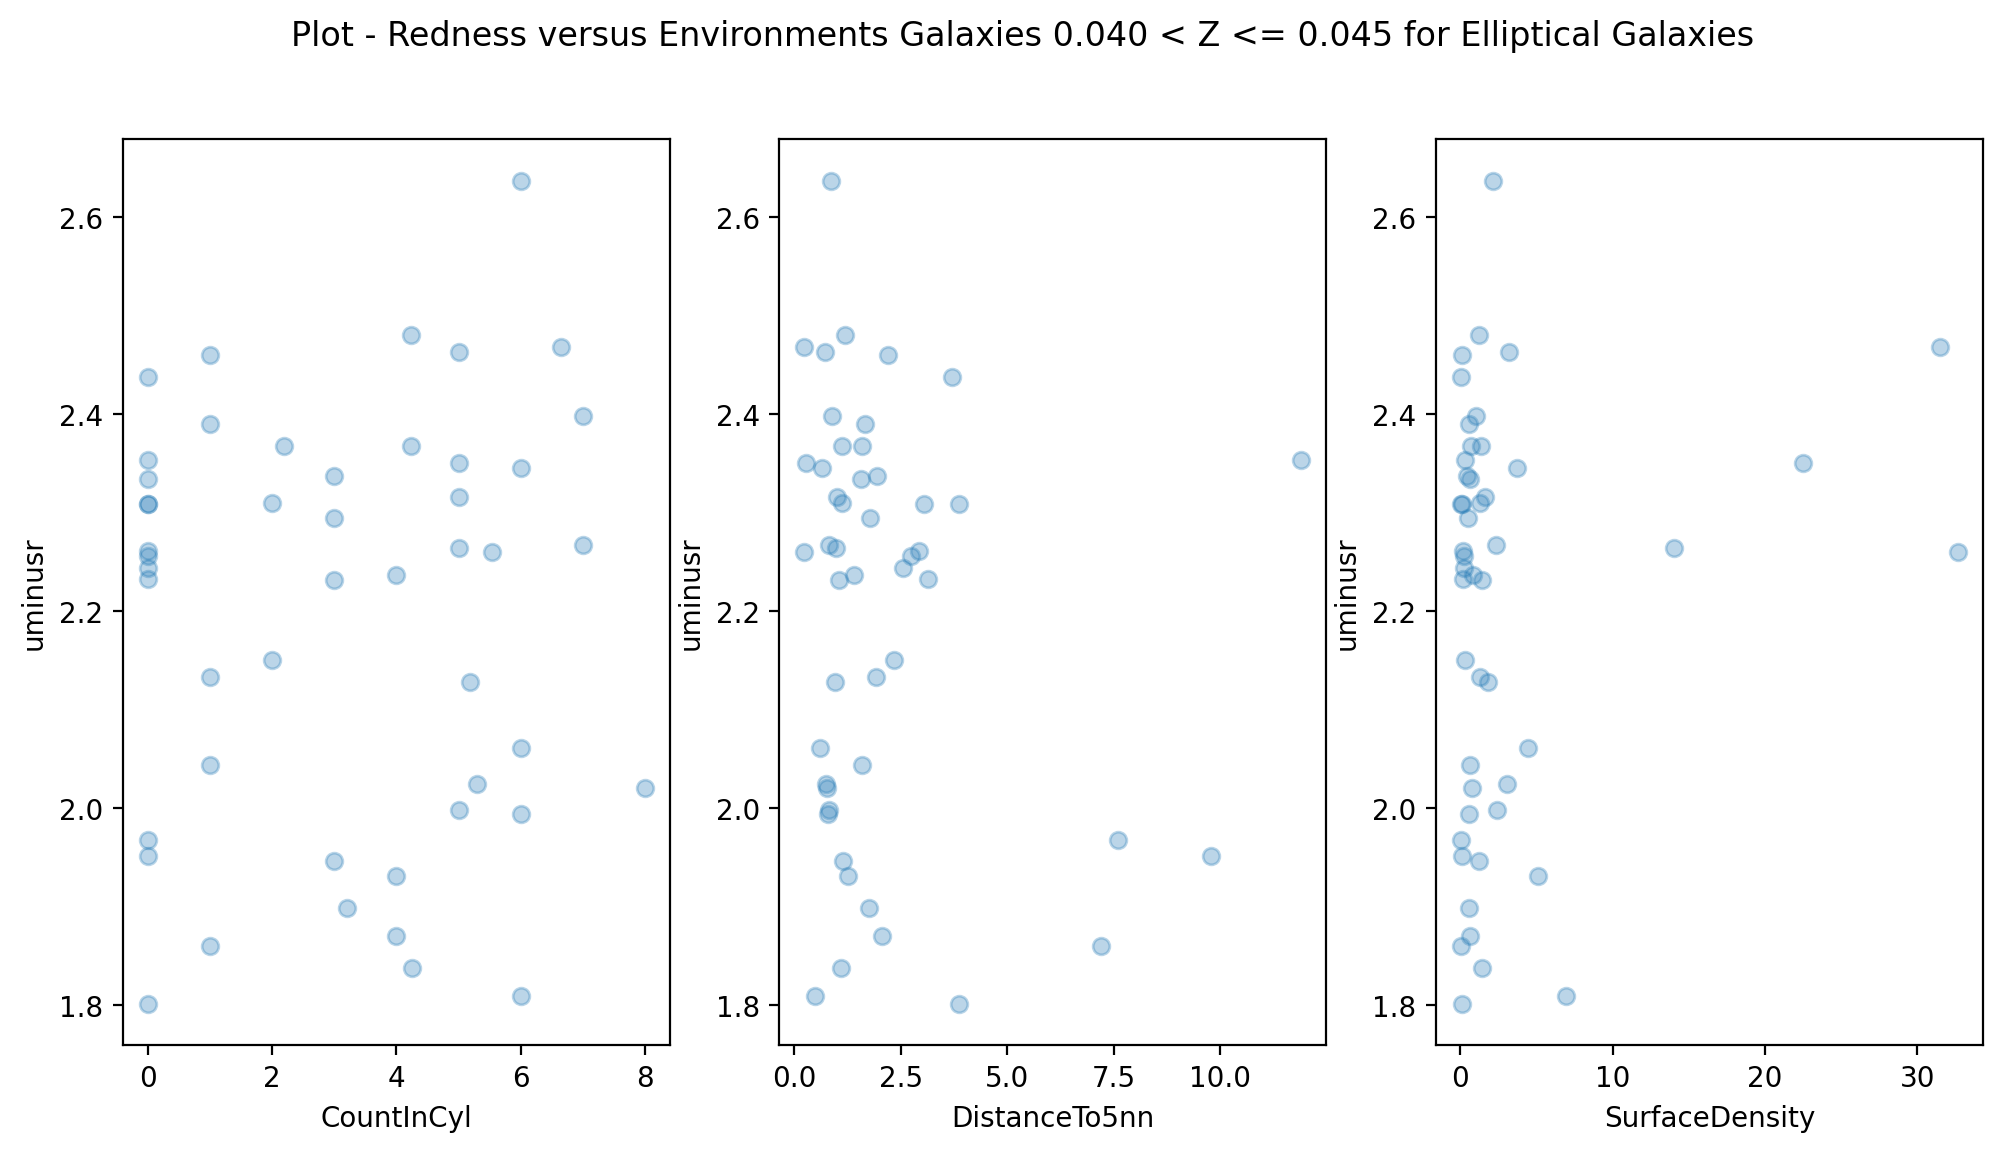

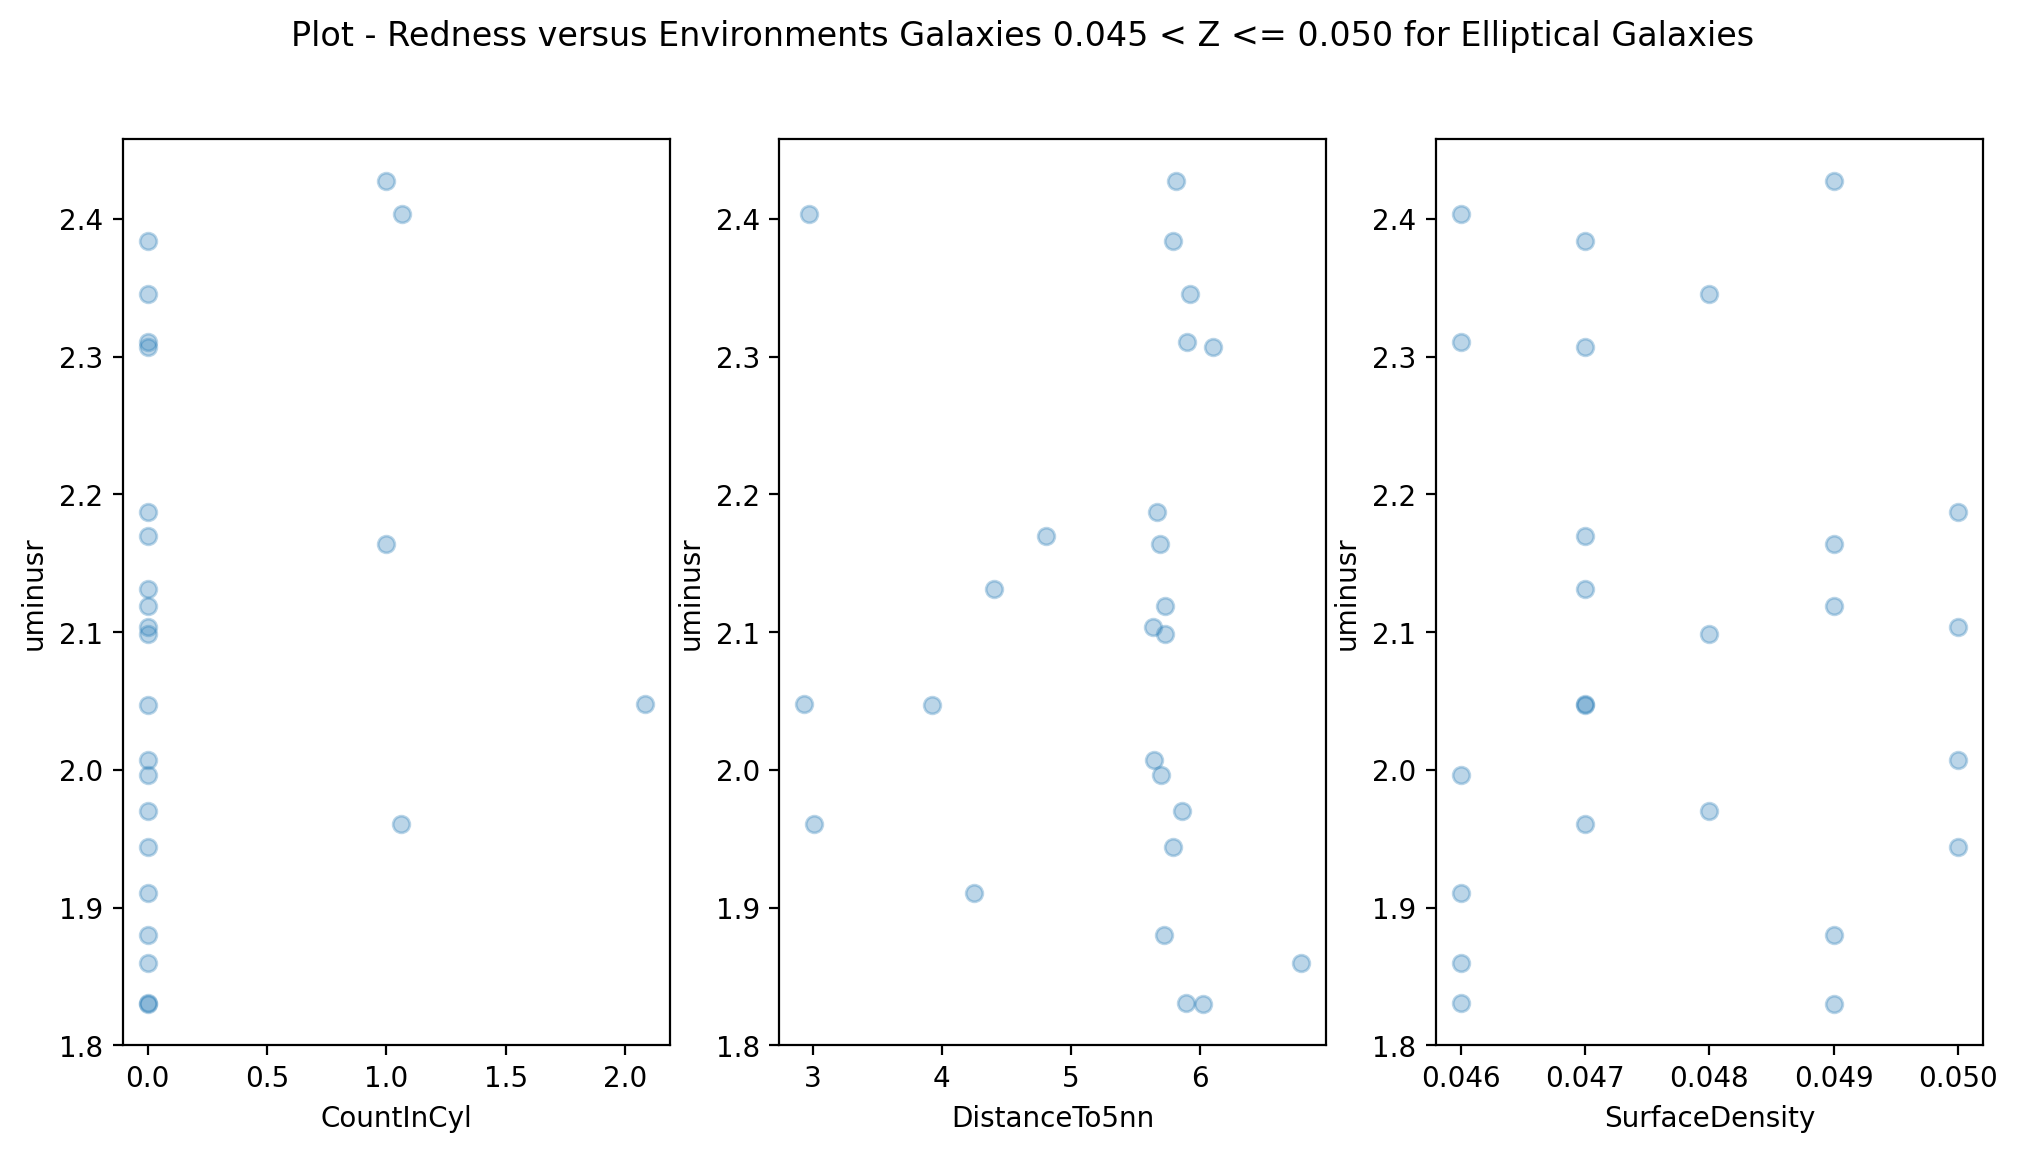

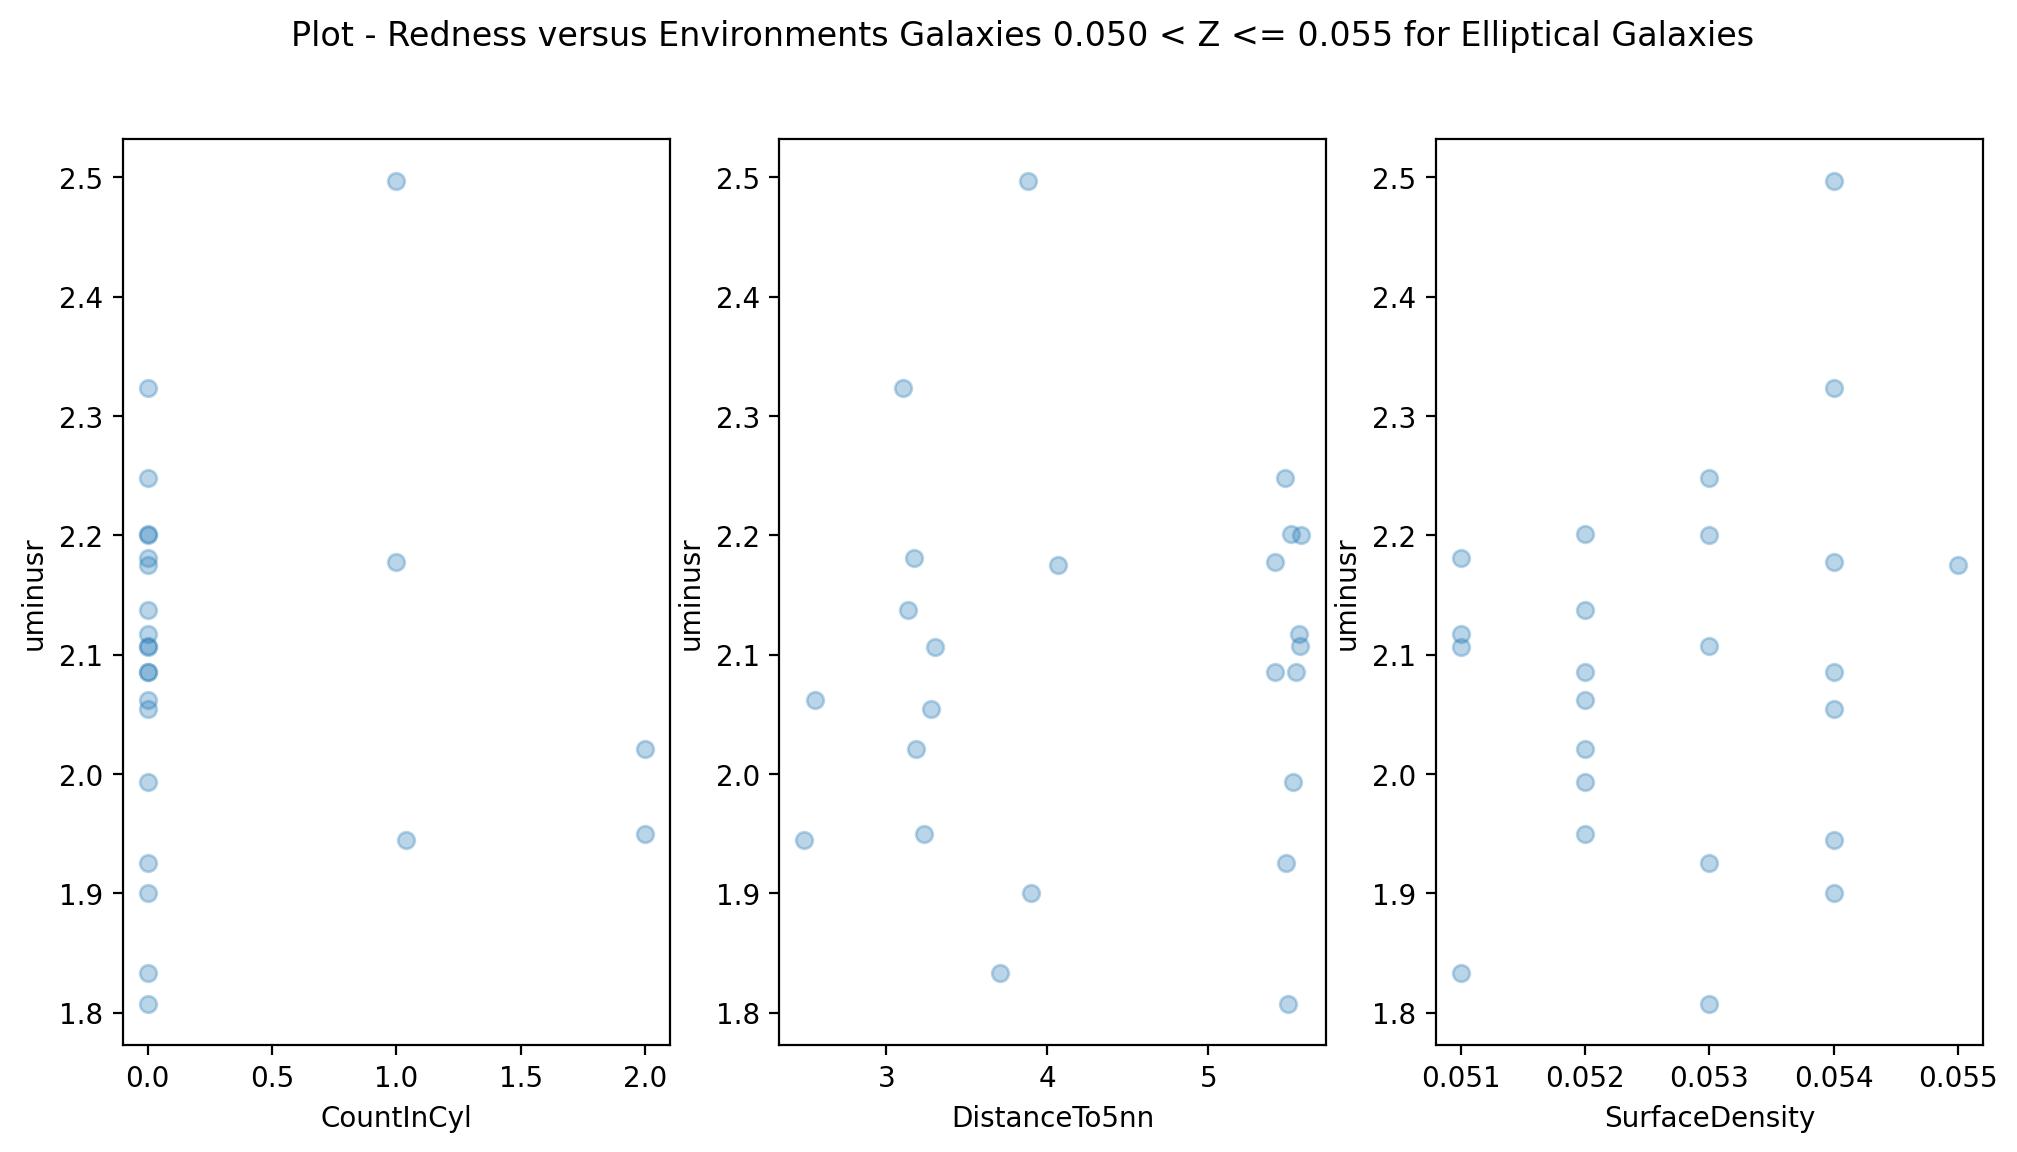

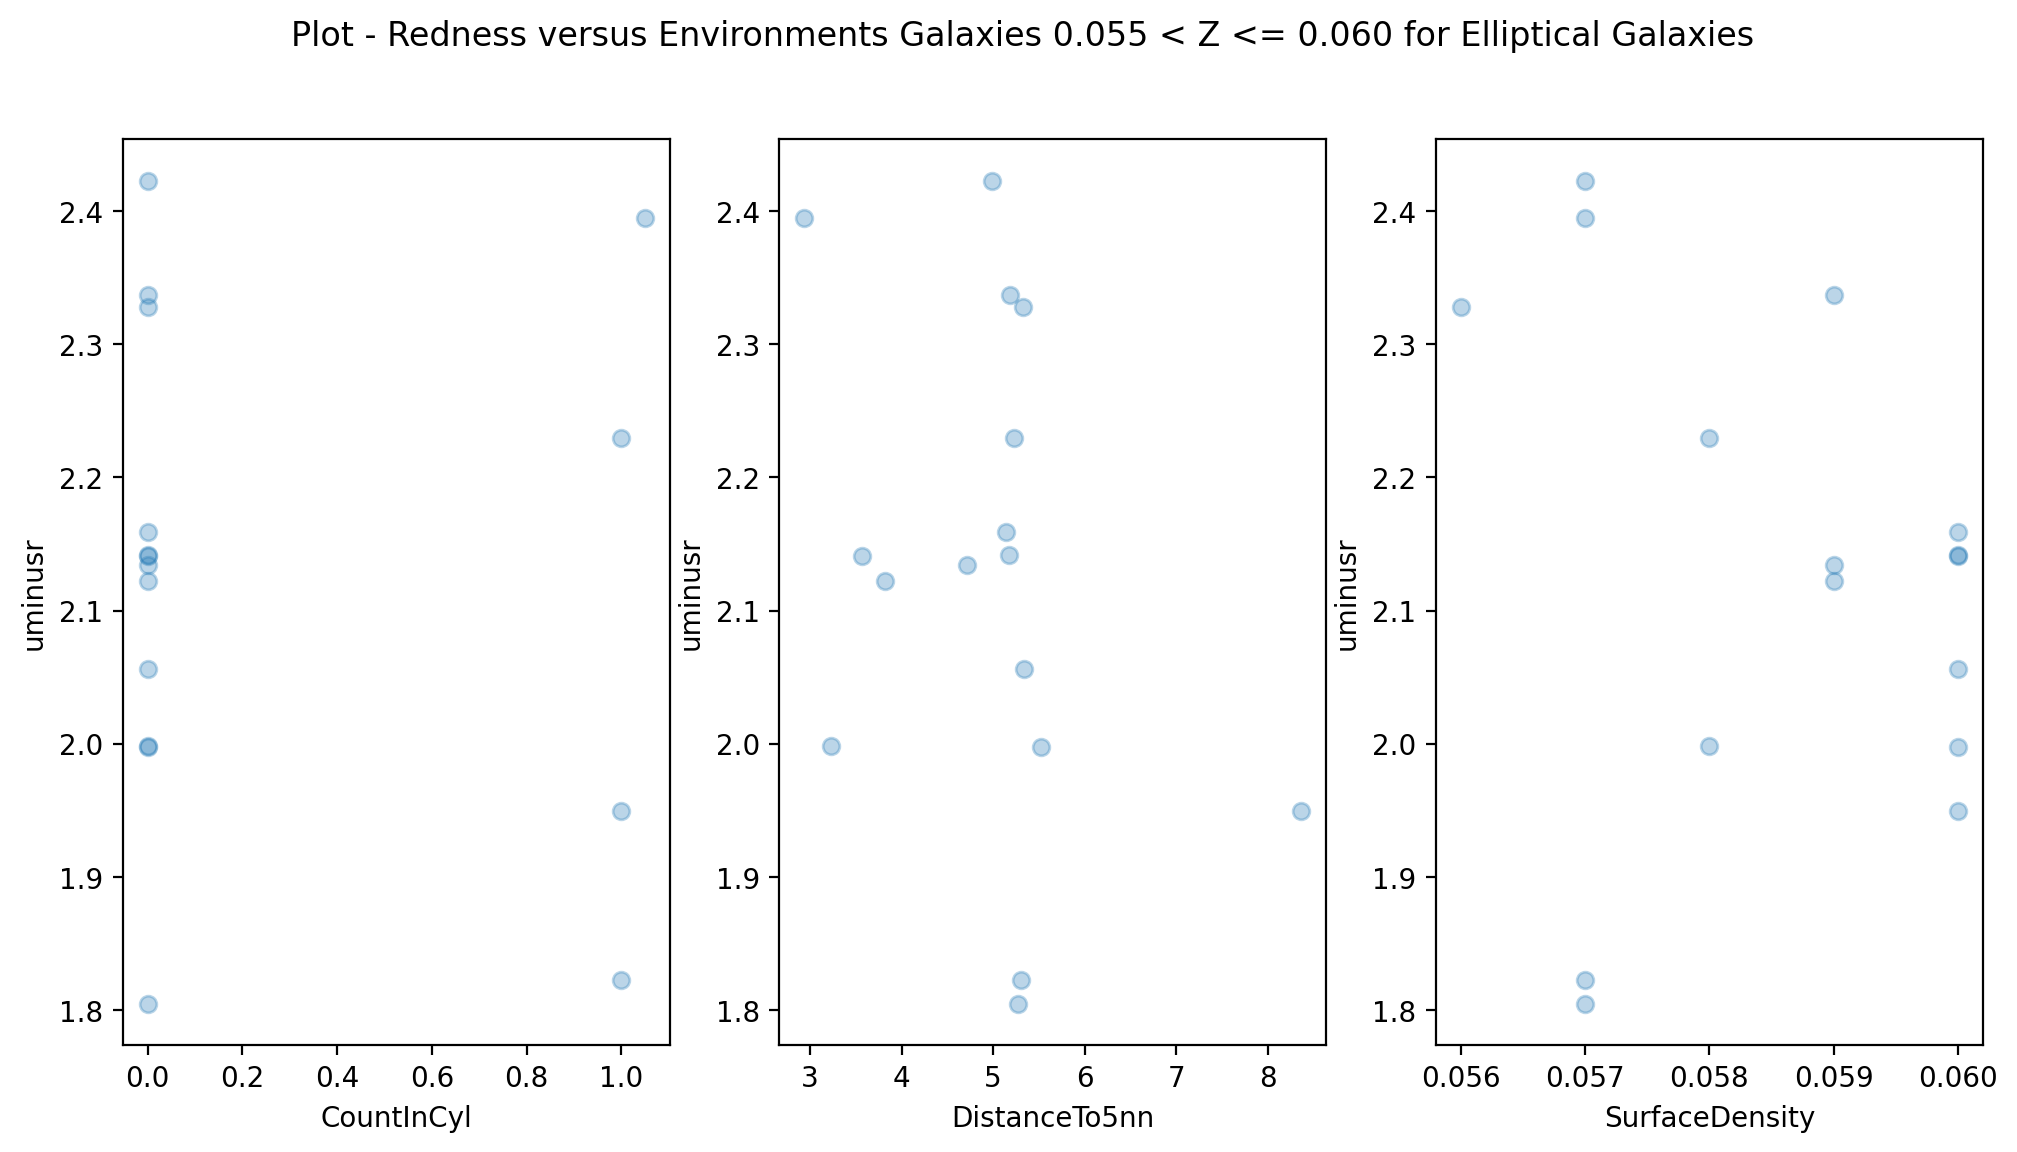

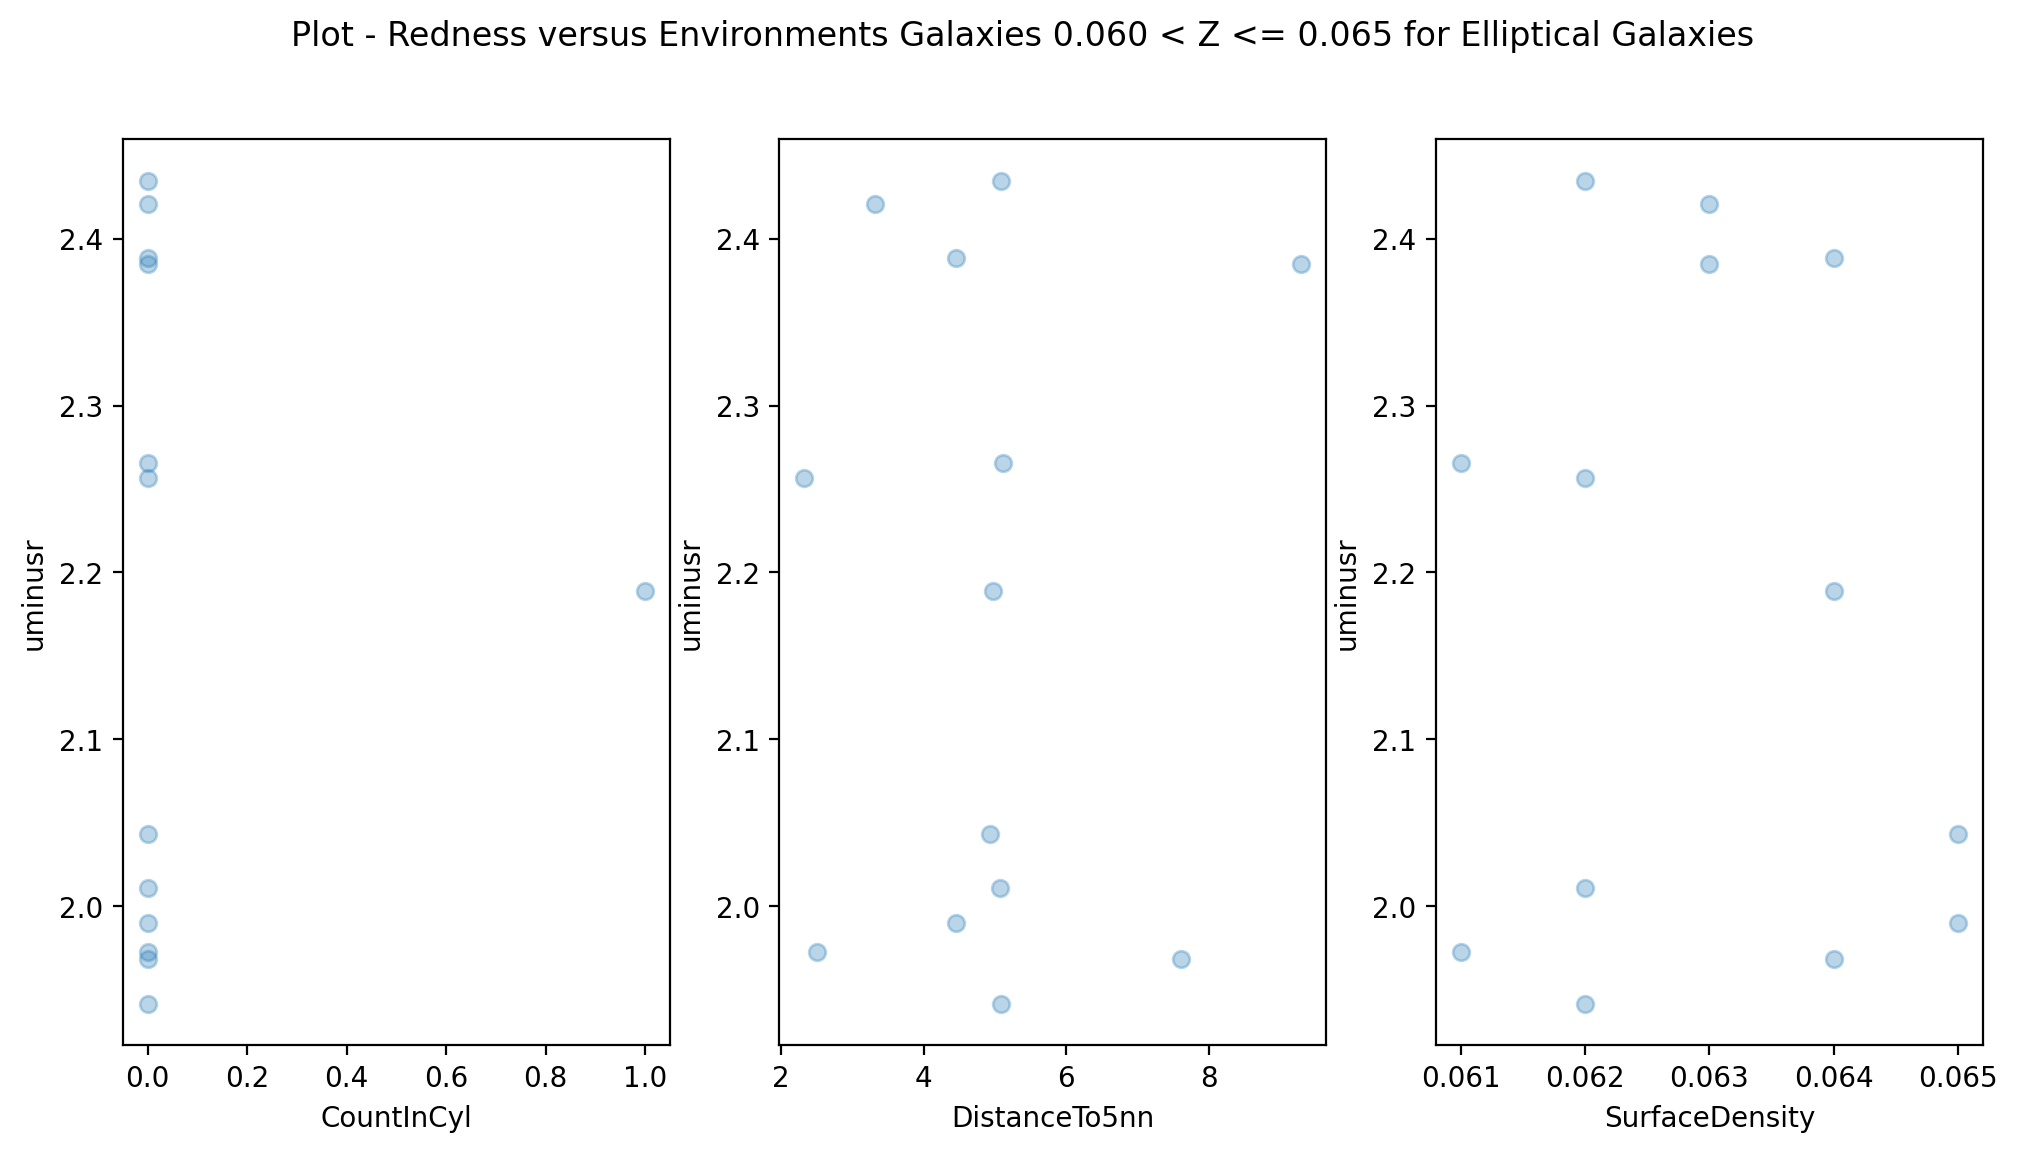

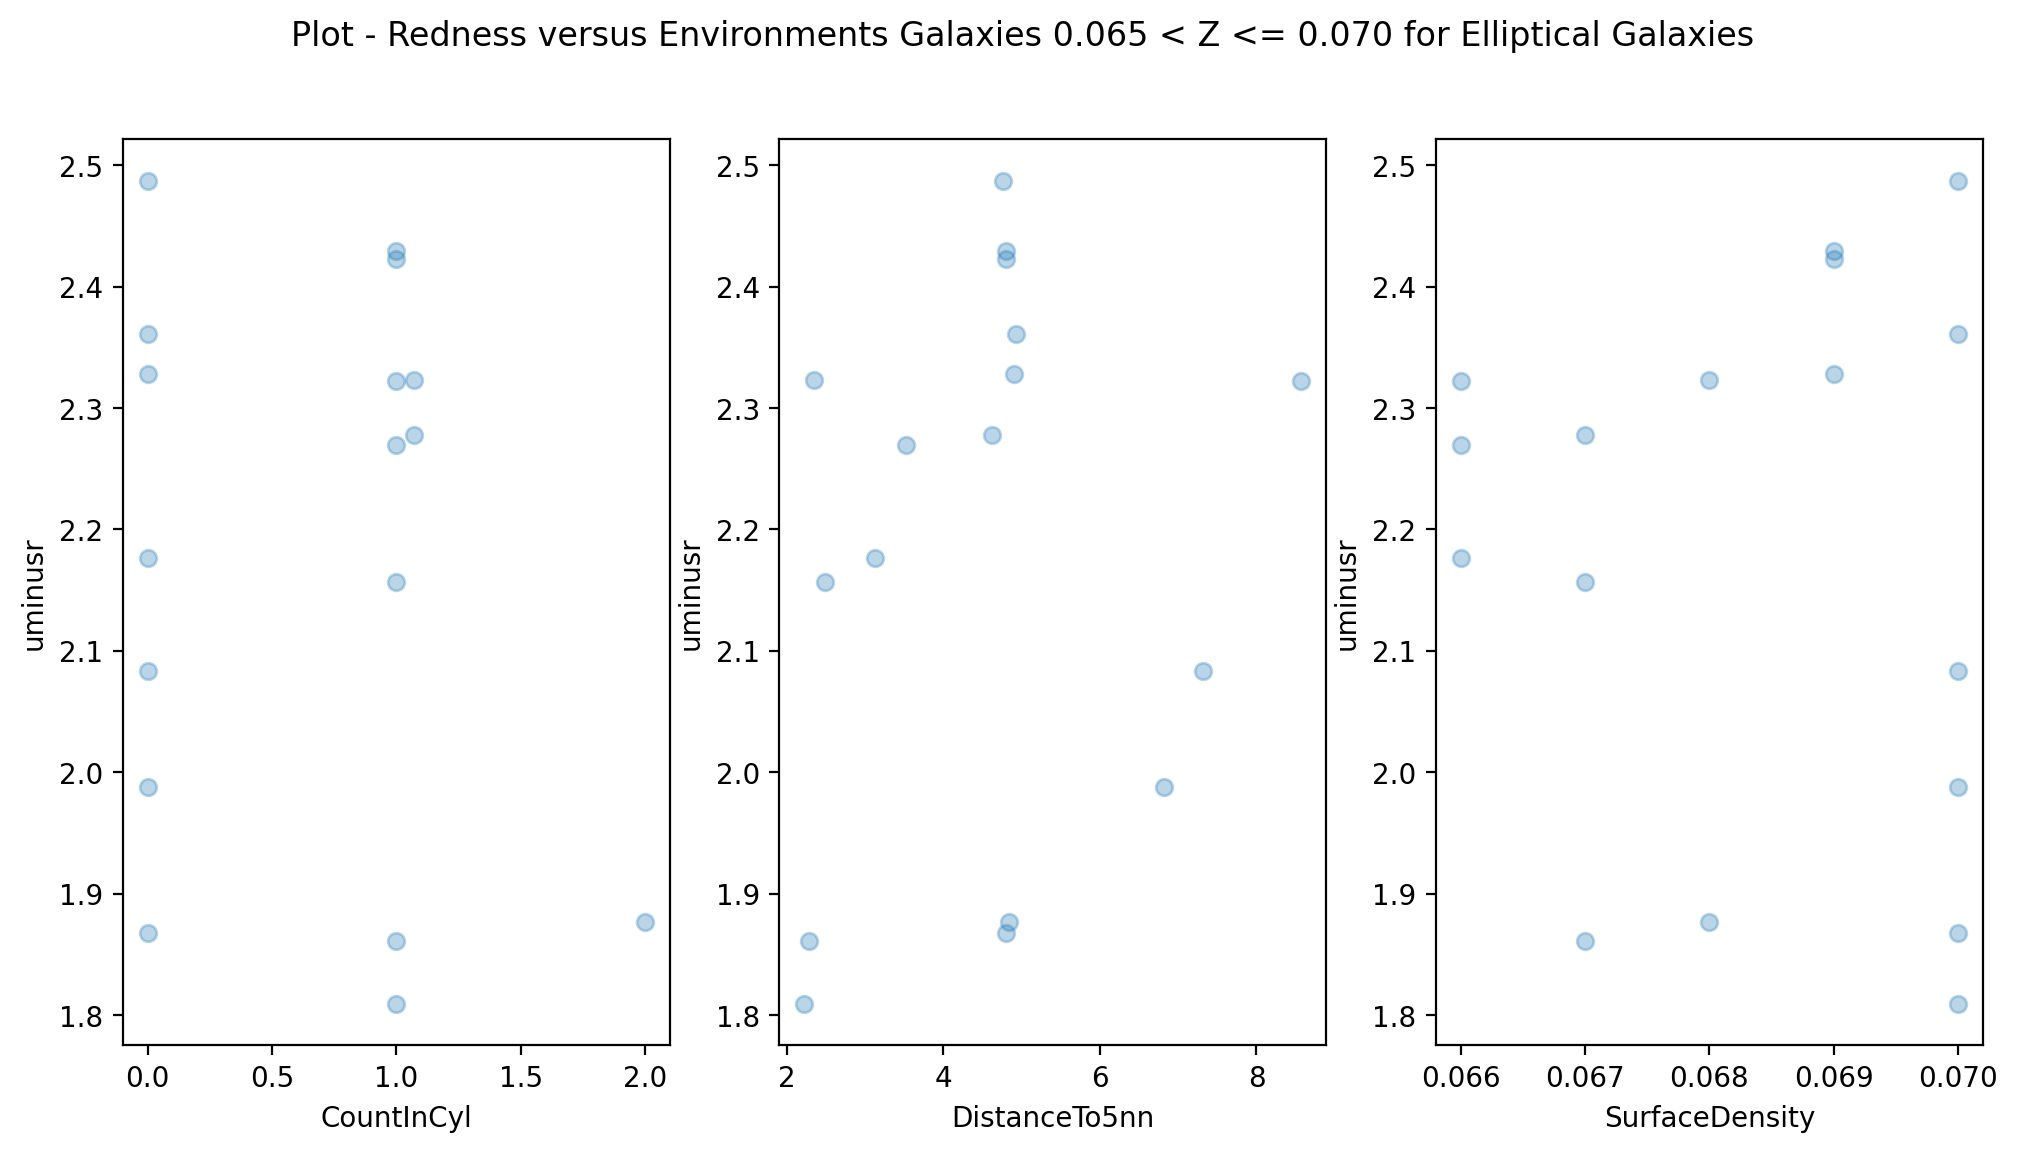

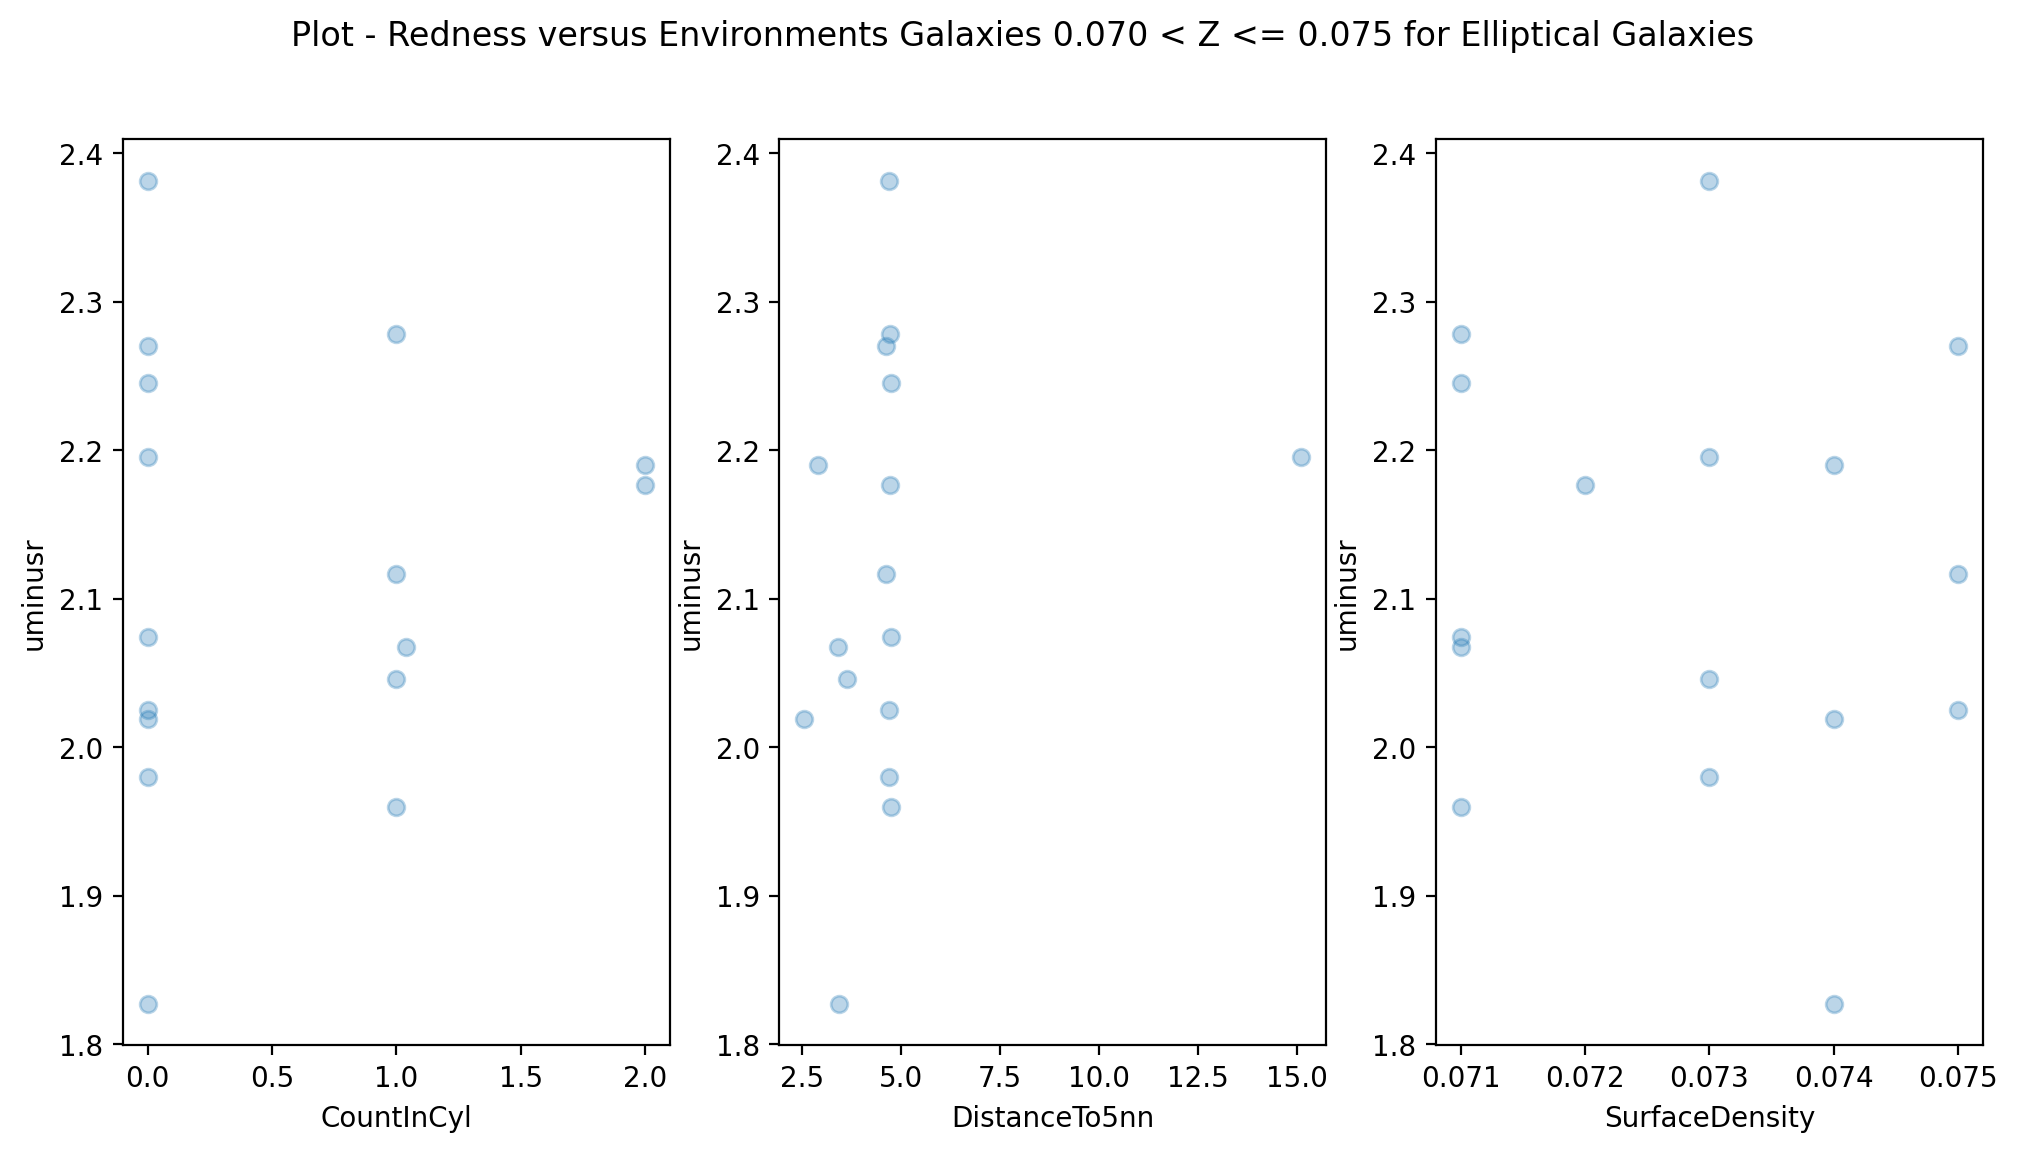

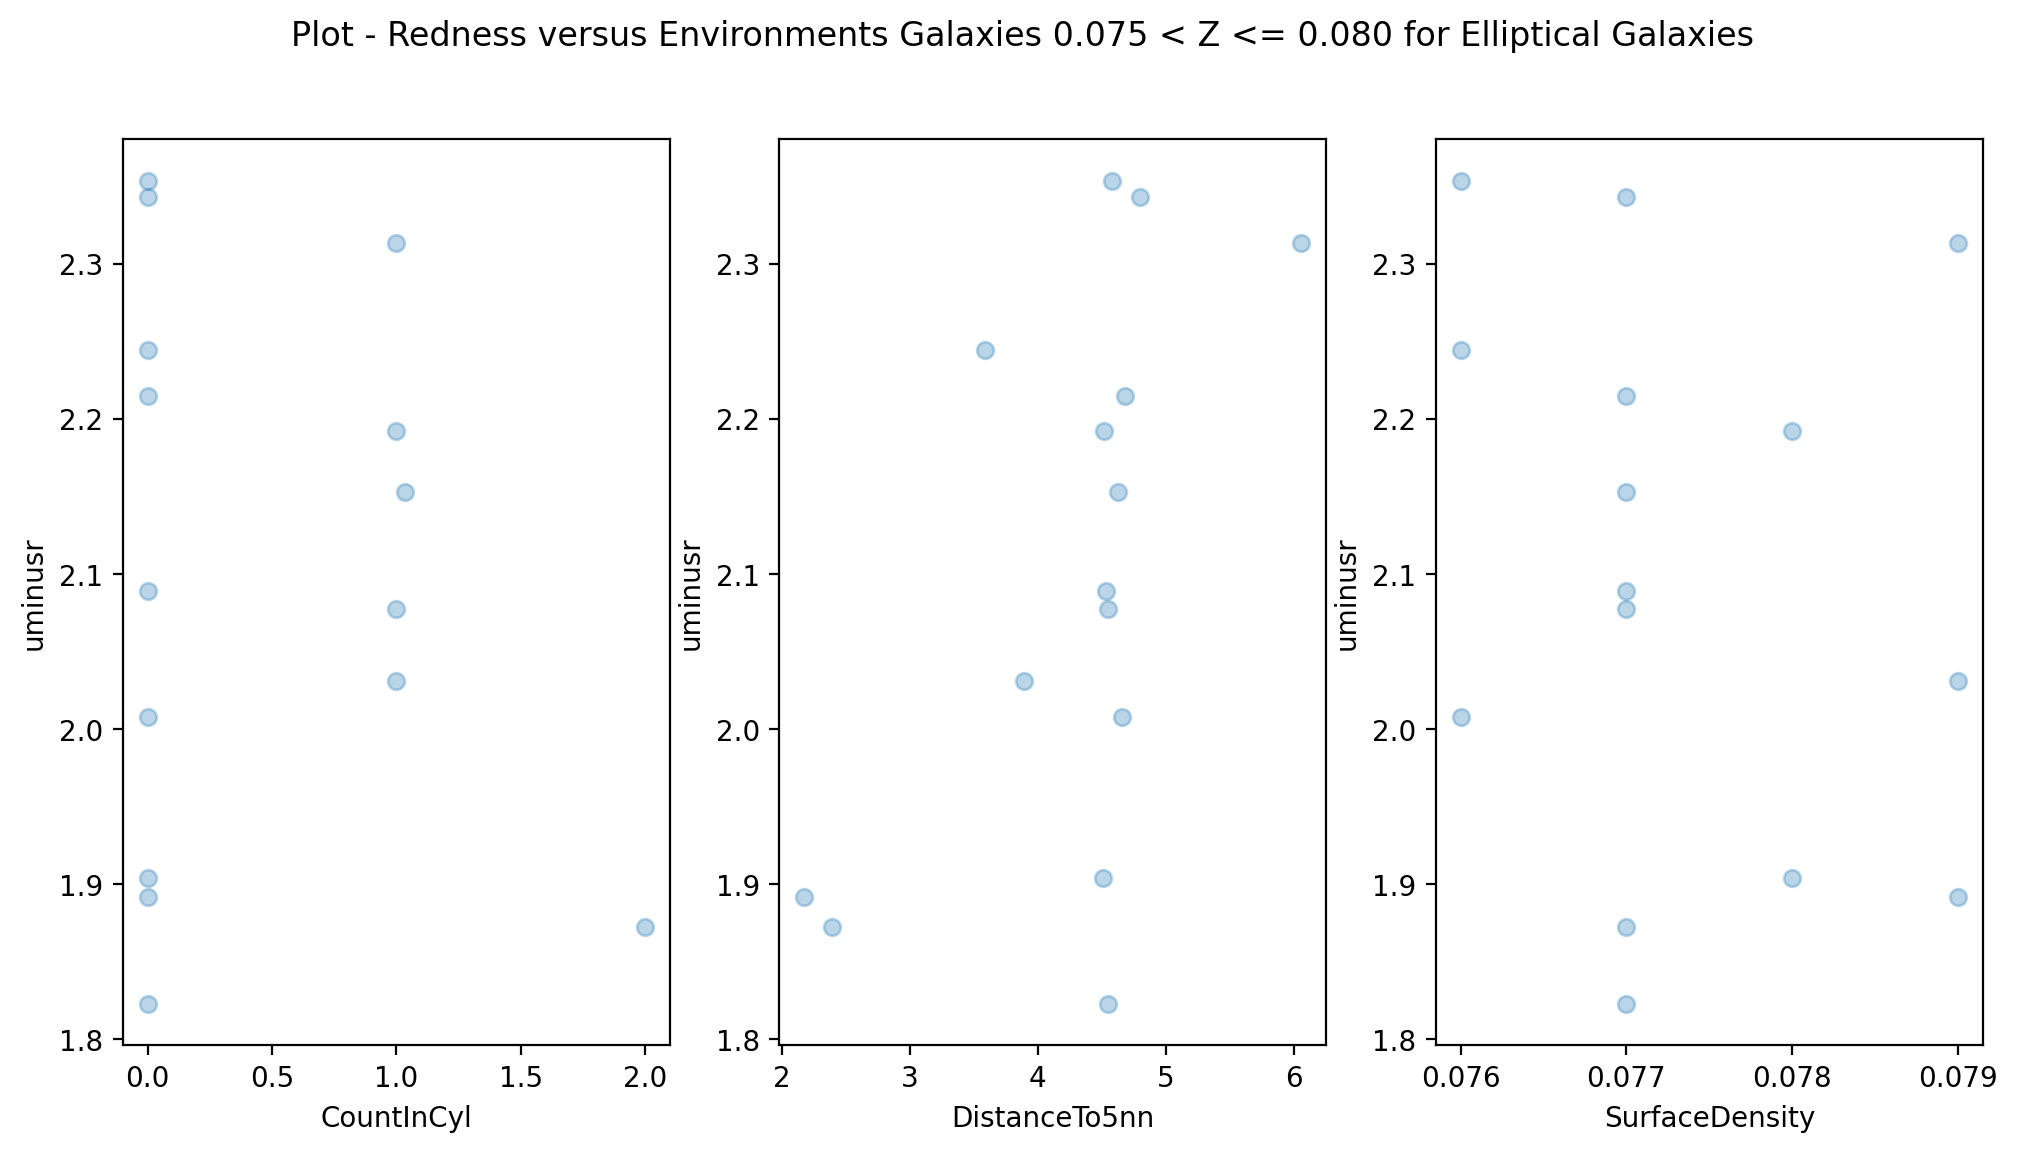

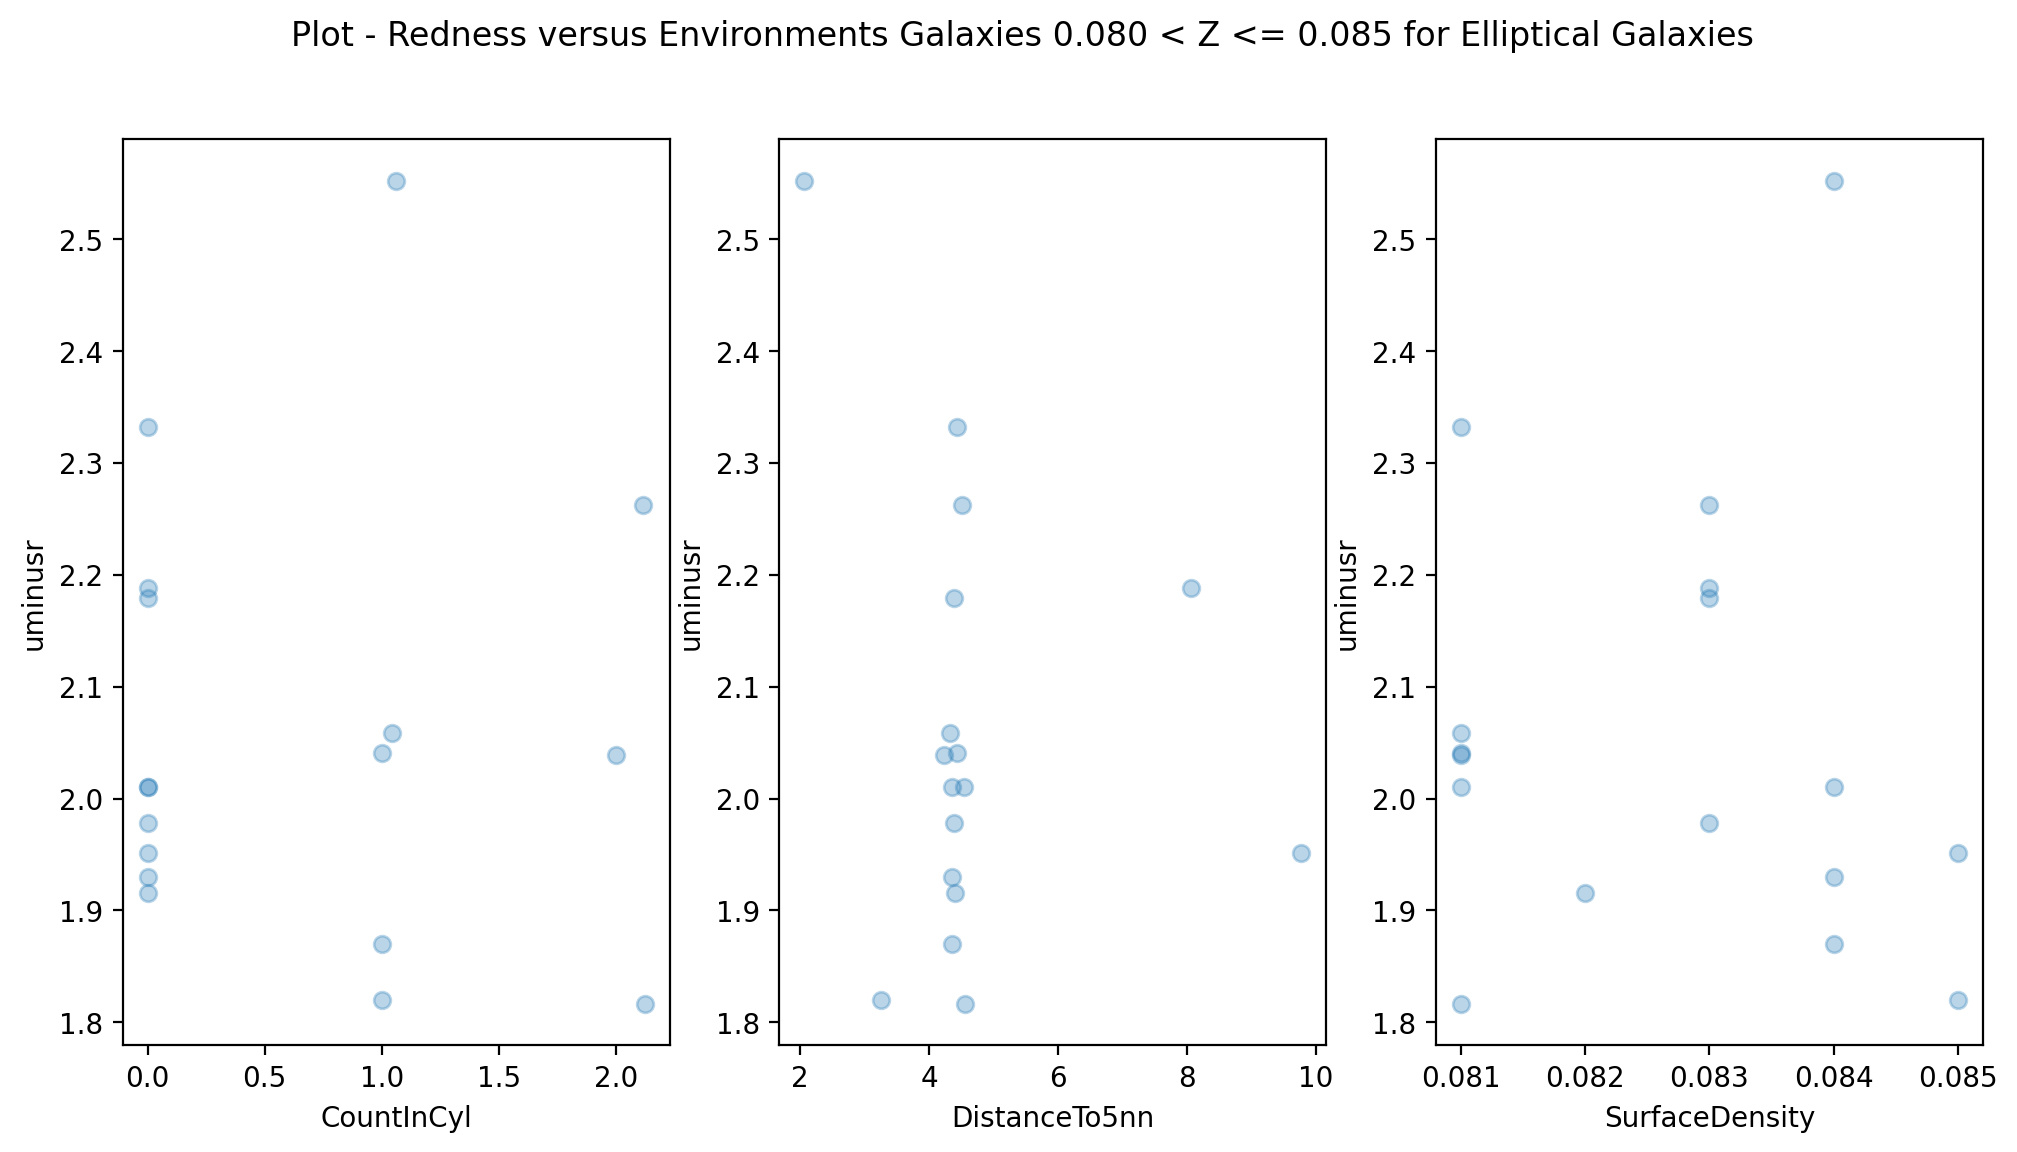

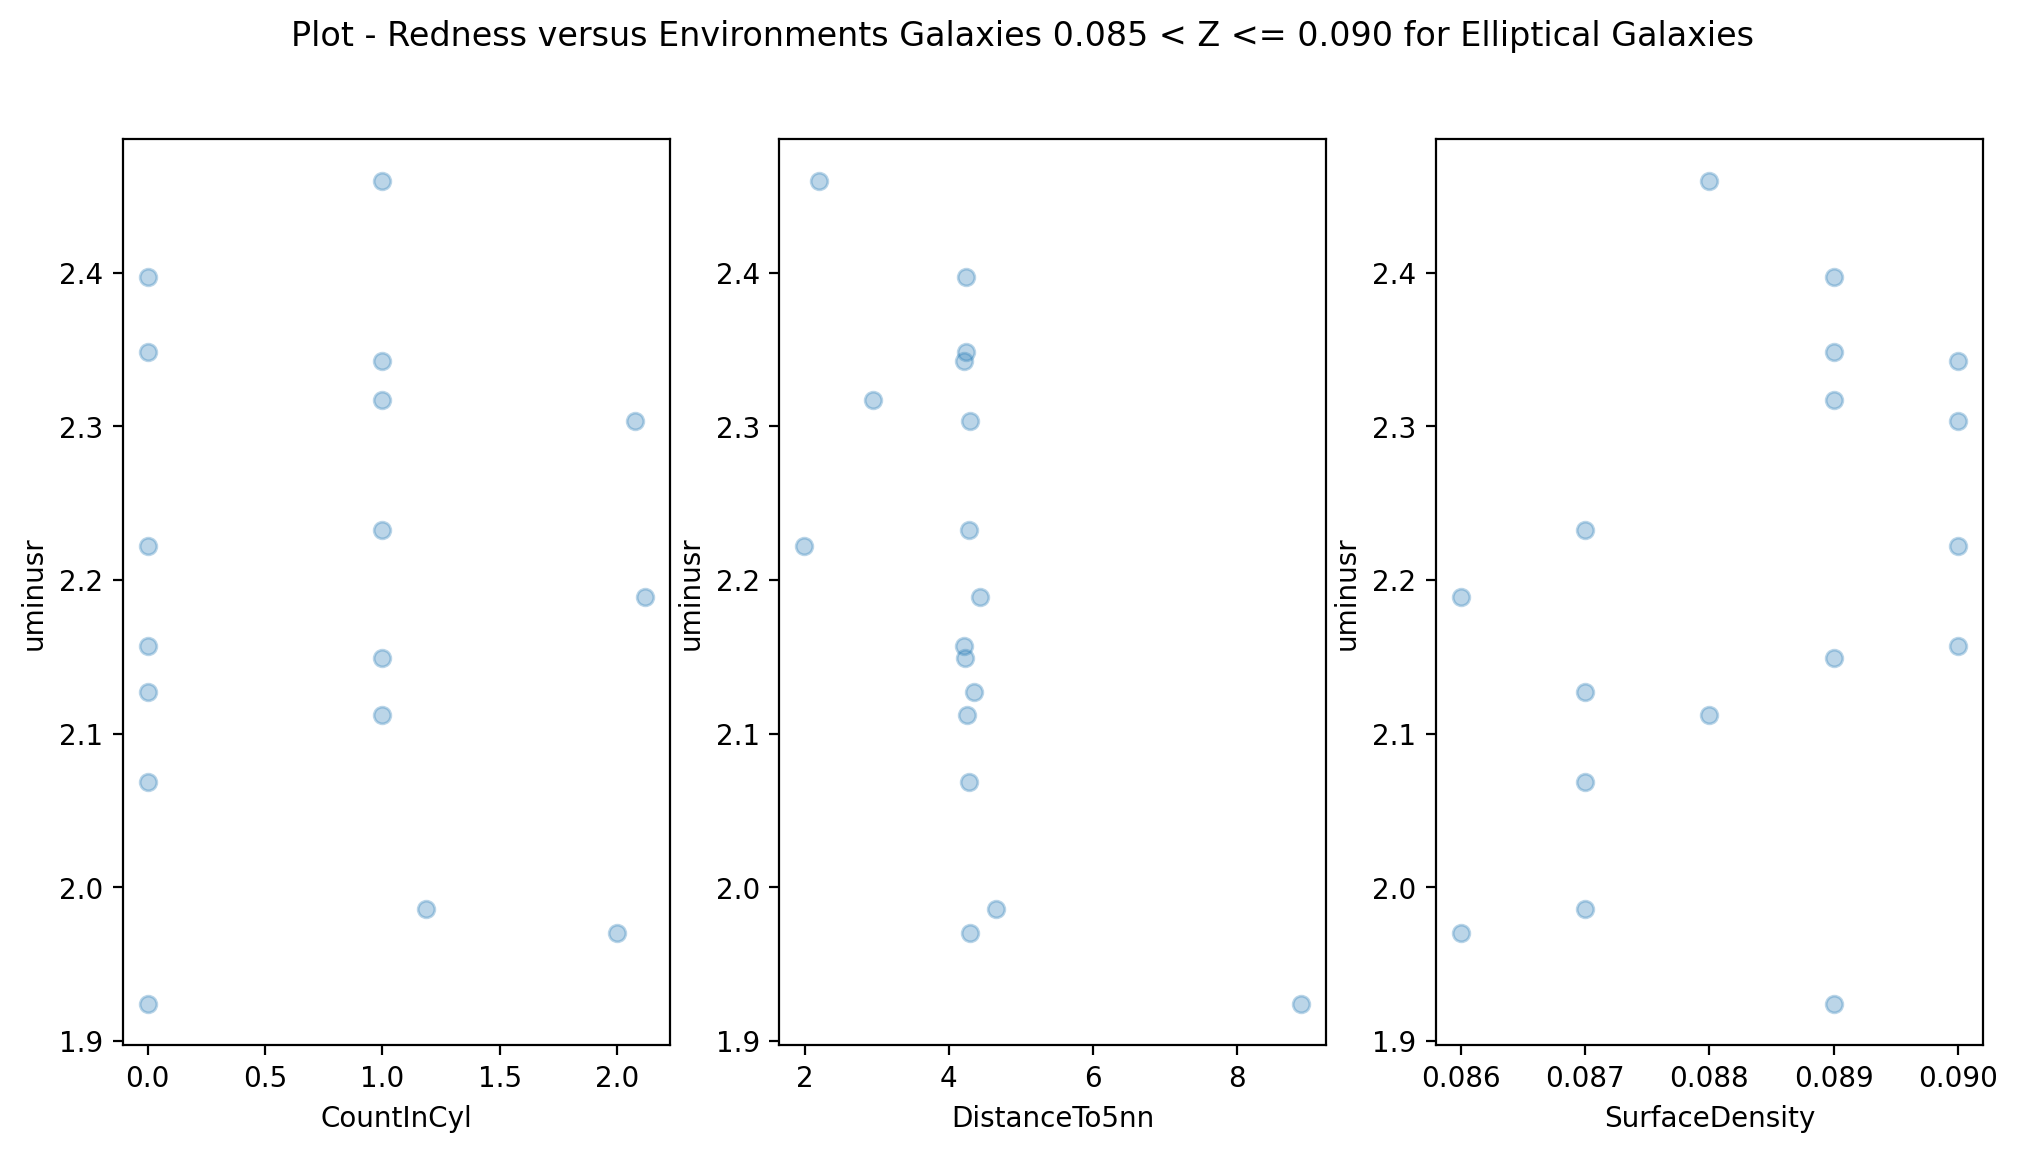

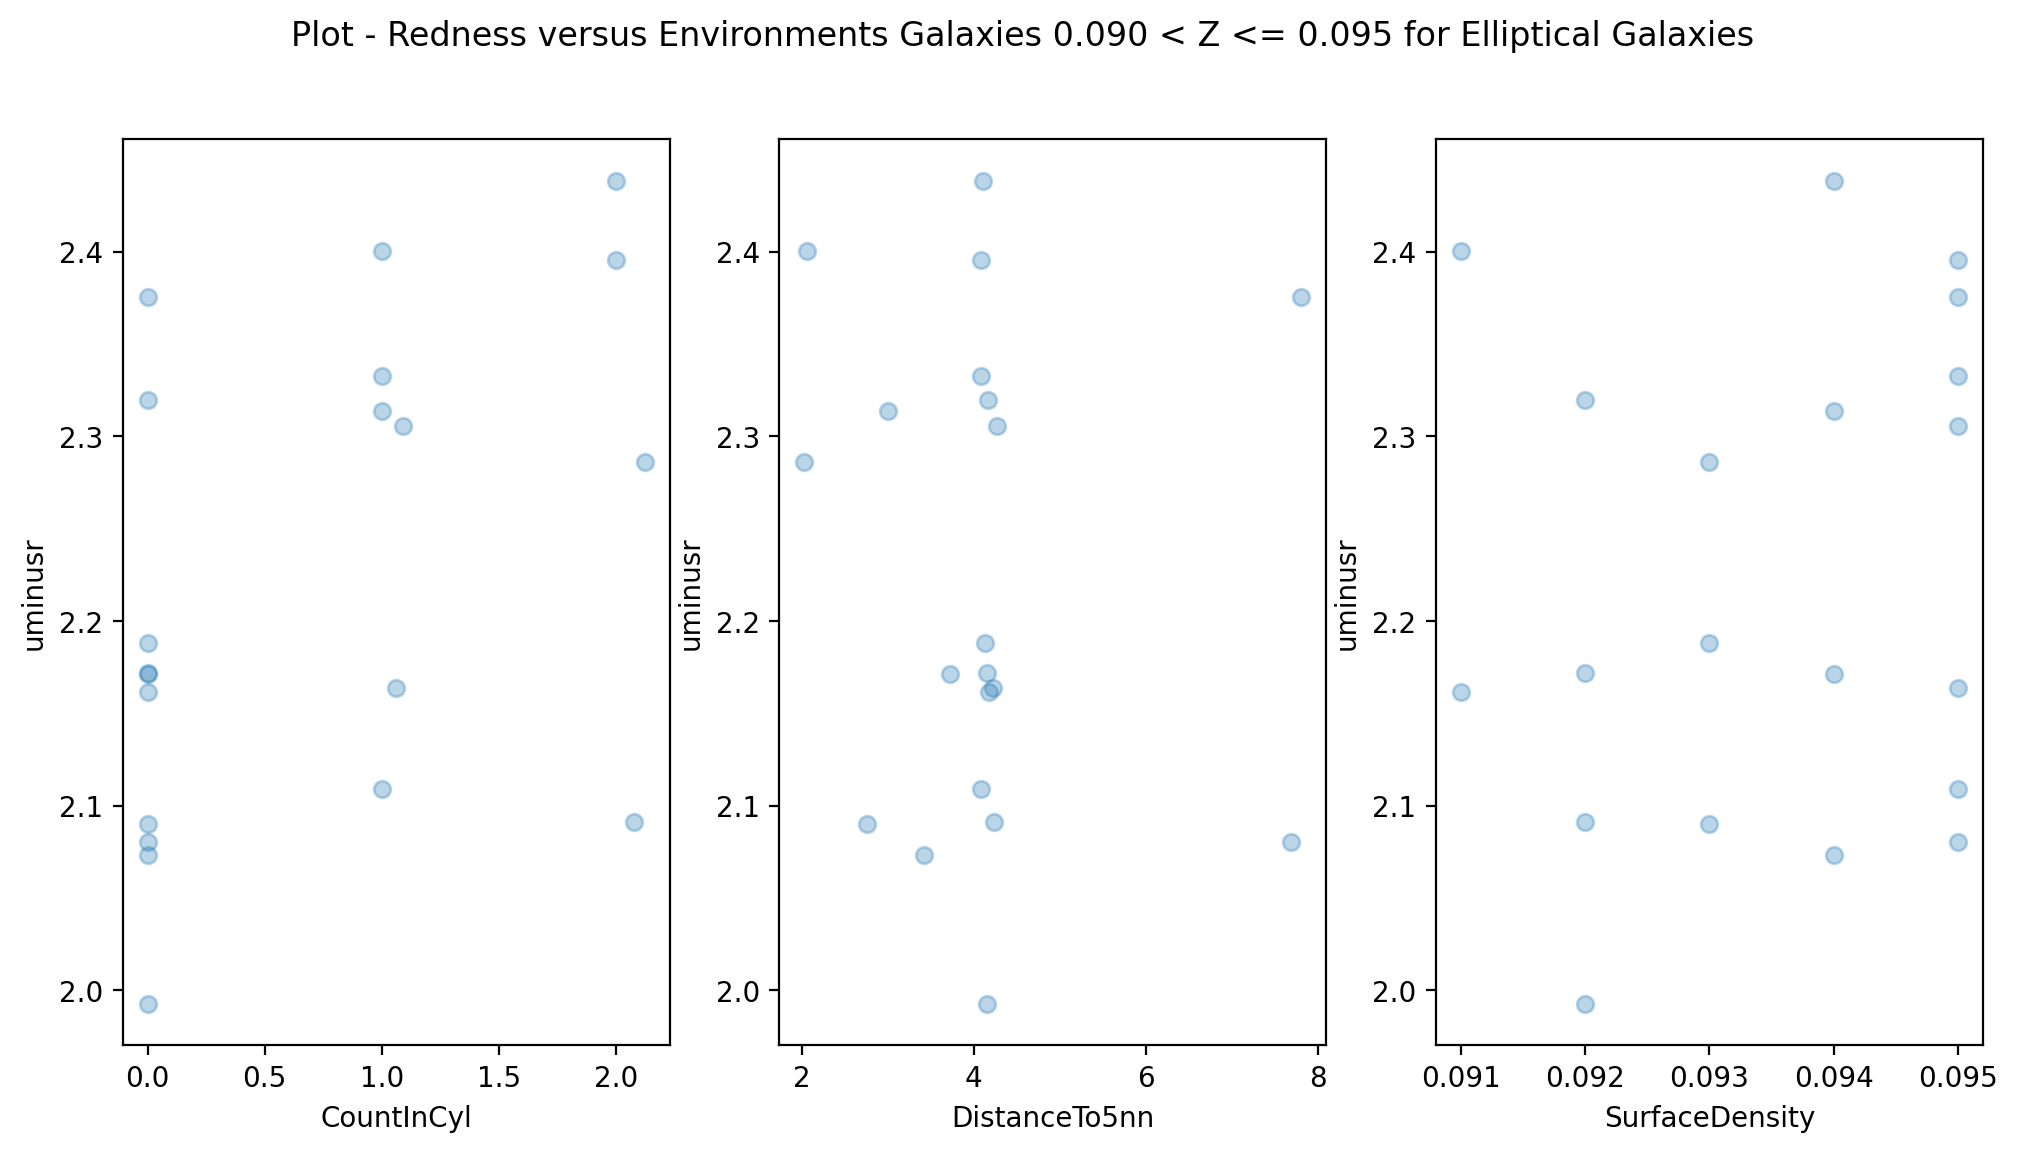

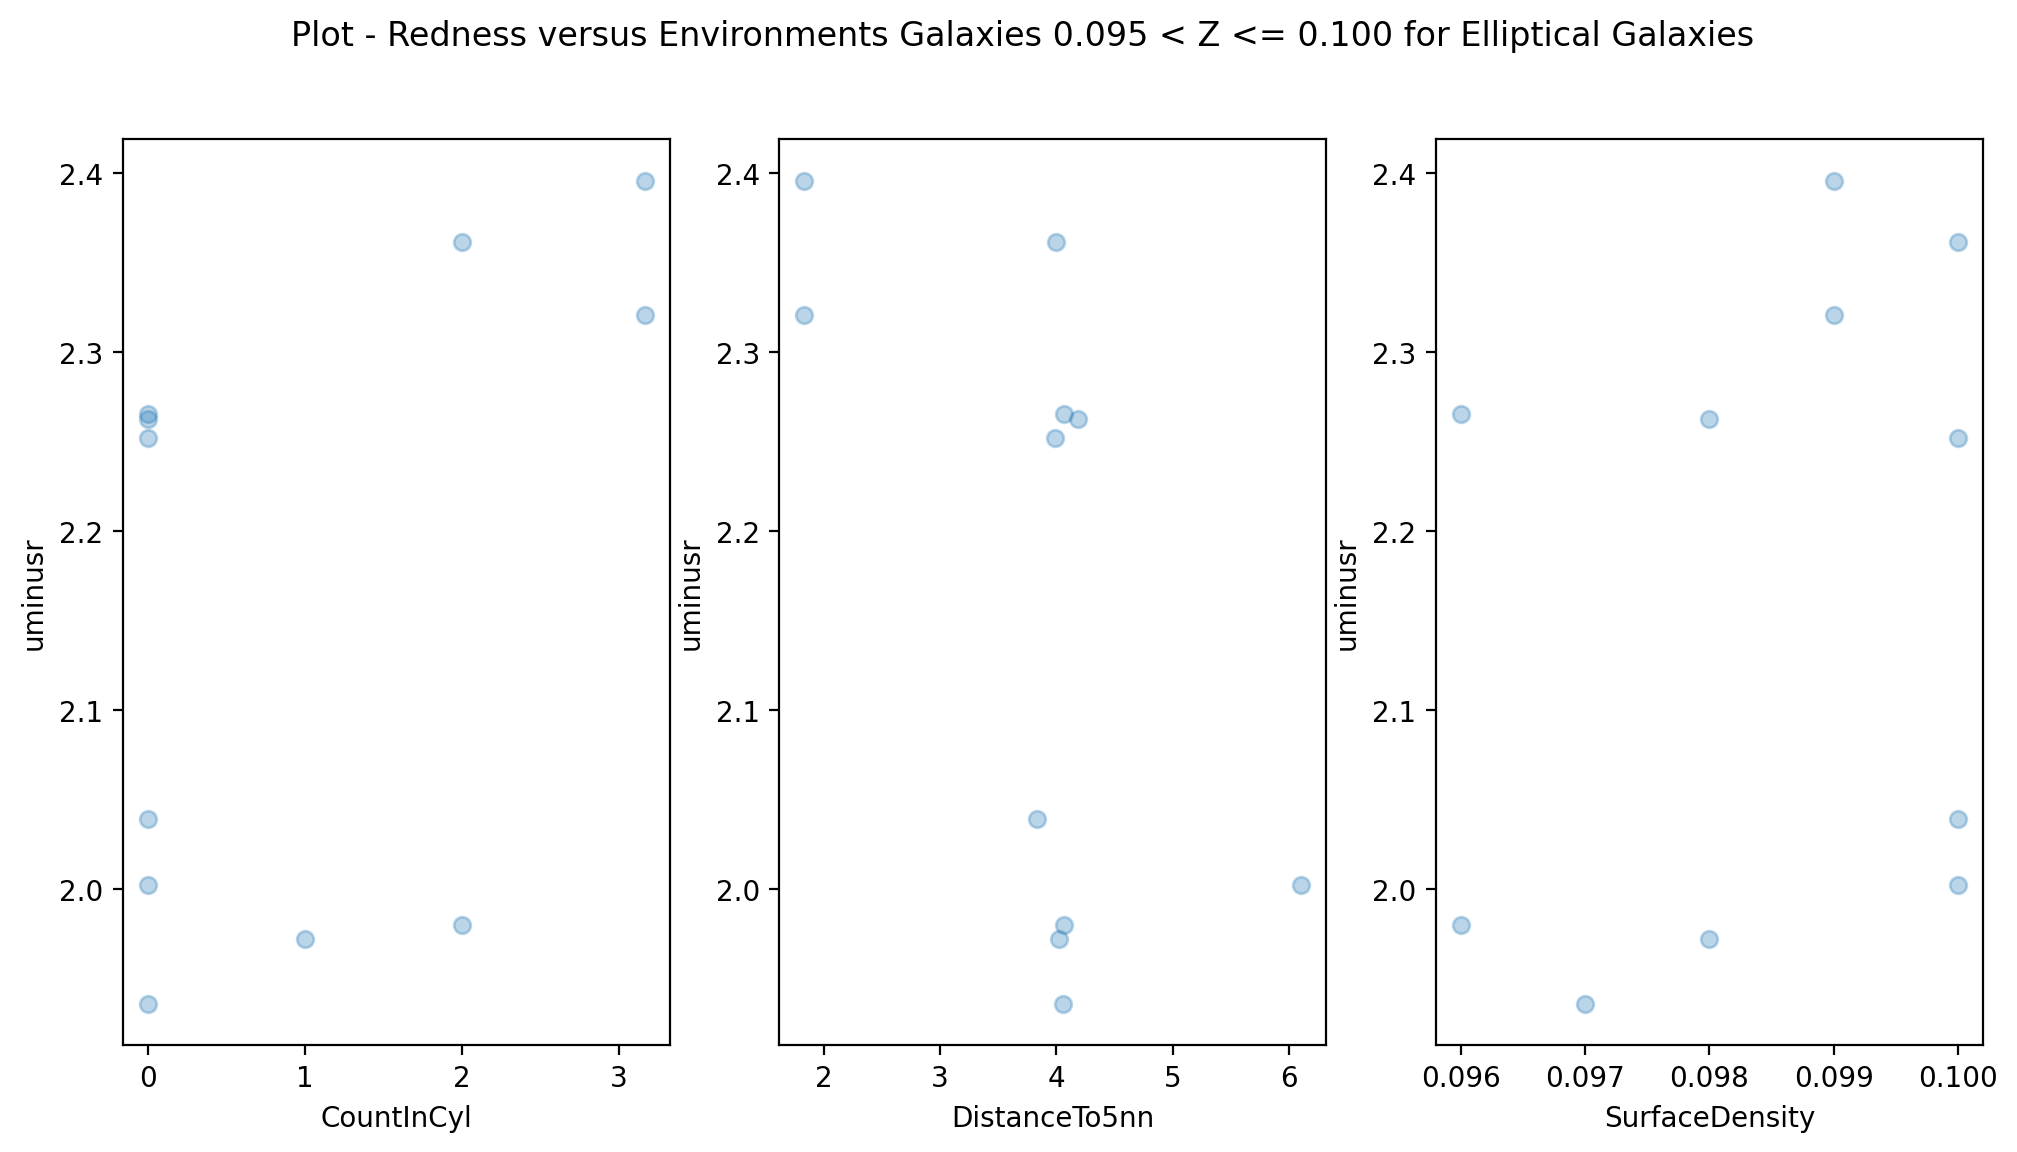

In [2]:
from astropy.table import Table, join
import numpy as np
import matplotlib.pyplot as plt

RawMassEClassEmeasure = Table.read('../../GAMA_Data/REMassEClassEmeasure.fits')
#print(RawMassEClassEmeasure.colnames)
# CLEAN DATA
REMassEClassEmeasure = RawMassEClassEmeasure[RawMassEClassEmeasure['CountInCyl']> -500]
REMassEClassEmeasure = REMassEClassEmeasure[REMassEClassEmeasure['SurfaceDensity']< 200]
print(len(REMassEClassEmeasure))

xfield = 'Z_1'
yfield = 'uminusr'
alphaVal = .3
step = 0.005
##################### Z ranges
for Z in np.arange(0.04,0.10,step) :
    RErange1a = REMassEClassEmeasure[REMassEClassEmeasure[xfield]>Z]
    RErange1  = RErange1a[RErange1a[xfield]<=Z+step]
    fig = plt.figure(figsize=(12, 6), dpi=200)
    fig.suptitle('Plot - Redness versus Environments Galaxies '+f'{Z:.3f}'+' < Z <= '+f'{(Z+step):.3f}'+' for Elliptical Galaxies')
    xfields = ['CountInCyl','DistanceTo5nn','SurfaceDensity']
    i = 1      
    y1 = RErange1[yfield]           
    for xfield in xfields :
       ax = fig.add_subplot(1, len(xfields), i)
       i += 1           
       ax.set_ylabel(yfield)
       ax.set_xlabel(xfield)
       x1 = RErange1[xfield]
       ax.scatter(x1,y1,alpha=alphaVal,label=xfield)        
#fig.legend(loc="upper right")
#plt.axis([0, 3, 0, 0.8])
plt.show()


